<a id='f_4'></a>
### Анализ данных по трудоустройству Благотворительного фонда "Рауль"
В проекте представлены данные о трудоустроенных благополучателях БФ "Рауль" и его НКО-провайдерами. 

Миссия фонда - создание условий для социализации и профессиональной самореализации молодых людей с инвалидностью, сиротским опытом, выпускников адаптированных образовательных программ. Фонду необходимо улучшить мониторинг ключевых социальных результатов - трудоустройств благополучателей.

**Цель исследования** - определить количество трудоустроенных кандидатов с ограниченными возможностями после адаптации и ответить на следующие вопросы:

 - Какова средняя продолжительность работы на одном рабочем месте у благополучателей?
 - Есть ли зависимость между наличием инвалидности и длительностью средней продолжительности работы?
 - Есть ли зависимость между наличием сиротского опыта и длительностью средней продолжительности работы?
 - Есть ли зависимость между наличием программы адаптации и длительностью средней продолжительности работы?
 
**Задачи исследования** - для выполнения поставленной цели данные проверены на ошибки и проанализированы основные параметры благополучателей, построены графики. Составлен общий вывод о сроках трудоустройств и адаптации. Разработан интерактивный дашборд.

**Исходные данные:** данные о кандидатах предоставленны Благотворительным фондом "Рауль". В датасете доступны данные о принадлежности благополучателя к одному из сегментов, ответственная НКО, регион, пол благополучателя, возраст, тип трудоустройства и тип работодателя.

Таким образом, исследование сделано в три этапа:
 1. [Обзор и предобработка данных](#f_1)
 2. [Анализ и описание данных](#f_2)
 3. [Подготовка дашборда](#f_3) 

#### СТЭК:

In [1]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

<a id='f_1'></a>
## Обзор и предобработка данных

[К оглавлению](#f_4) 

Данные загружены из Google Sheets.

In [2]:
from io import BytesIO
import requests
spreadsheet_id = '1UA3eal_l7e6ZFHMza8MNXR8PIwppg4DKRjUrf7DDXD8'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data = pd.read_csv(BytesIO(r.content), sep=';')

Составлено первое представление о данных с помощью универсальной функции.

In [3]:
def fst_imp(data):
    """This function is giving first impression of data."""
    return (display(data.head(5)), #вывод первых 5 строк датасета на экран
            print(data.info()),  # информация о датасете
            print('---------------------------------------------'),
           
            pd.set_option('display.float_format', lambda x: '%.3f' % x), #Suppress Scientific Notation to correct ".display()" output
            display(data.describe()), # статистика числовых данных датасета
            print("Exact duplicates:", data.duplicated().sum()), # проверка датасета на явные дубликаты
            print(" "),
            print("Blanks by columns:"), # проверка данных на наичие пропусков
            display(pd.DataFrame(round(data.isna().mean()*100,2)).style.background_gradient('coolwarm')))
import warnings
warnings.filterwarnings('ignore')# отключим всплывающие предупреждения

In [4]:
data = pd.read_excel('БФРауль_Данные_по_трудоустроенным.xls')
print(fst_imp(data))

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
0,0,1,Женский,25,2018-12-06,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
1,1,2,Мужской,28,2021-09-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09,NaT,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
2,2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Unnamed: 0                                259 non-null    int64         
 1   id_кандидата                              259 non-null    int64         
 2   пол                                       259 non-null    object        
 3   возраст                                   259 non-null    int64         
 4   дата_добавления                           258 non-null    datetime64[ns]
 5   инвалидность                              259 non-null    object        
 6   сиротский_опыт                            259 non-null    object        
 7   адаптированная_образовательная_программа  259 non-null    object        
 8   начало_трудоустройства                    259 non-null    datetime64[ns]
 9   завершение_трудоустройства      

,Unnamed: 0,id_кандидата,возраст
count,259.000,259.000,259.000
mean,129.000,122.293,22.359
std,74.911,70.736,5.575
min,0.000,1.000,14.000
25%,64.500,61.500,18.000
50%,129.000,124.000,22.000
75%,193.500,182.500,25.000
max,258.000,242.000,39.000


Exact duplicates: 0
 
Blanks by columns:


,0
Unnamed: 0,0.000000
id_кандидата,0.000000
пол,0.000000
возраст,0.000000
дата_добавления,0.390000
инвалидность,0.000000
сиротский_опыт,0.000000
адаптированная_образовательная_программа,0.000000
начало_трудоустройства,0.000000
завершение_трудоустройства,67.180000


(None, None, None, None, None, None, None, None, None)


Итак, с технической точки зрения в датасете типы данных определены корректно, явных дубликатов нет, есть пропуски - 67% в столбце "завершение_трудоустройства". Это значит, что 67% благополучателей трудоустроены на данный момент.Остальные пропуски заполнены значением 'unknown'.

In [5]:
data['дата_добавления'] = data['дата_добавления'].fillna('unknown')
data['тип_площадки'] = data['тип_площадки'].fillna('unknown')
data['тип_опыта_работы'] = data['тип_опыта_работы'].fillna('unknown')
data['тип_трудоустройства'] = data['тип_трудоустройства'].fillna('unknown')


In [6]:
#заменим булевы значения ИСТИНА/ЛОЖЬ на ДА/НЕТ
def bool_replacement(series):
    data[series] = data[series].replace('ИСТИНА', 'ДА')
    data[series] = data[series].replace('ЛОЖЬ', 'НЕТ')

bool_list=['инвалидность', 'сиротский_опыт', 'адаптированная_образовательная_программа', '1+_месяц_работы']
bool_replacement(bool_list)    

Проверим количество уникальных лагополучателей в датасете.

In [7]:
len(data['id_кандидата'].unique())

242

Количество строк в датасете - 259, но количество уникальных благополучаелей - 242. Таким образом,некоторые благополучатели встречаются в датасете несколько раз. Для анализа данных о самих благополучателях, временно удалены эти дубли и создан новый датасет с первичной информацией о кандитатах.

In [8]:
candidates = data.loc[:,'id_кандидата':'адаптированная_образовательная_программа']
print("Количество дубликатов среди кандидатов",candidates.duplicated().sum())
candidates = candidates.drop_duplicates().reset_index(drop=True) 
print("Количество дубликатов среди кандидатов после обработки:",candidates.duplicated().sum())

Количество дубликатов среди кандидатов 16
Количество дубликатов среди кандидатов после обработки: 0


<a id='f_2'></a>
## Анализ и описание данных

[К оглавлению](#f_4) 

Проанализируем возраст благополучателей, построив диаграмму размаха.

In [9]:
# установим по умолчанию правило размещения графиков по центру
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

Средний возраст благополучателя: 21.0


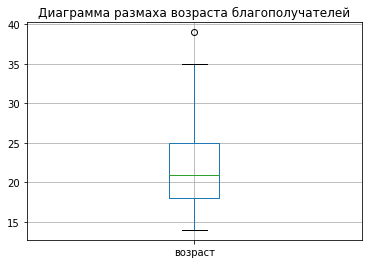

In [10]:
candidates.boxplot('возраст')
plt.title('Диаграмма размаха возраста благополучателей');
print('Средний возраст благополучателя:', candidates['возраст'].median())

Судя по полученному графику, средний возраст благополучателя - 21 год, а возрастной диапазон равен 15-39 лет. 

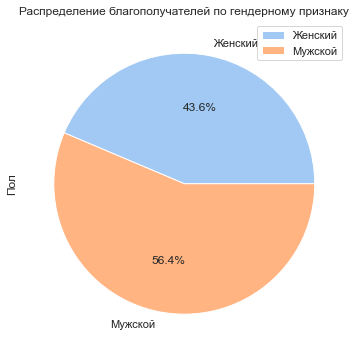

In [11]:
pivot_gender = (candidates.pivot_table(index = 'пол', values = 'id_кандидата', aggfunc = 'count')
         .rename(columns = {'id_кандидата': 'Пол'})
        )
sns.set_theme(style="ticks", palette="pastel")
pivot_gender.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(6,6))
plt.title('Распределение благополучателей по гендерному признаку');

Большую часть среди благополучателей занимают мужчины - 56,4%, в то время как женщины - 43,6%.


In [12]:
disabled = (candidates.pivot_table(index = 'инвалидность', values = 'id_кандидата', aggfunc = 'count')
         .rename(columns = {'id_кандидата': 'инвалидность'}))
orphans = (candidates.pivot_table(index = 'сиротский_опыт', values = 'id_кандидата', aggfunc = 'count')
         .rename(columns = {'id_кандидата': 'сиротский_опыт'}))
adopt_prog = (candidates.pivot_table(index = 'адаптированная_образовательная_программа', values = 'id_кандидата', aggfunc = 'count')
         .rename(columns = {'id_кандидата': 'адаптированная_образовательная_программа'}))

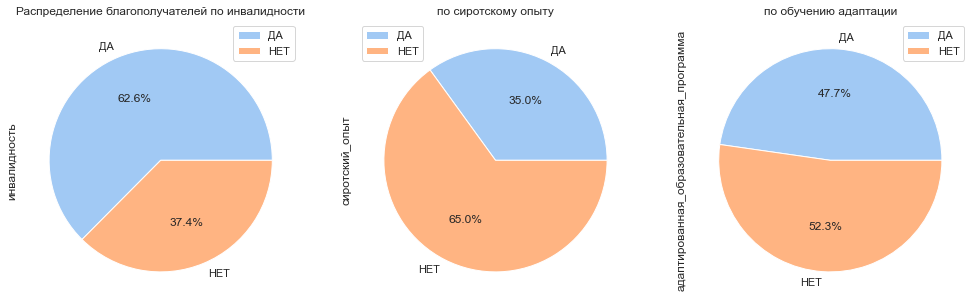

In [13]:
fig, axes = plt.subplots(1,3, figsize=(17,77)) #параметр, располагающий 2 графика в одной плоскости

ax = disabled.plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=axes[0]); 
axes[0].set_title('Распределение благополучателей по инвалидности')

orphans.plot(kind='pie', subplots=True, autopct='%1.1f%%',  ax=axes[1])
axes[1].set_title('по сиротскому опыту')

adopt_prog.plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=axes[2])
axes[2].set_title('по обучению адаптации');


Судя по полученным диаграммам, большая часть кандидатов в датасете являются инвалидами, без сиротского опыта. Распределение кандидатов по прохождению адаптированной образовательной программы примерно одинаковое.

Ниже построены графики распределения благополучателей по типу площадки и по типу опыта работы.

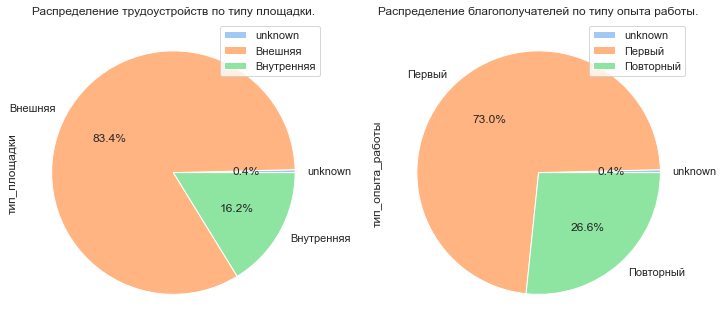

In [14]:
market_type = (data.pivot_table(index = 'тип_площадки', values = 'id_кандидата', aggfunc = 'count')
         .rename(columns = {'id_кандидата': 'тип_площадки'}))
experience_type = (data.pivot_table(index = 'тип_опыта_работы', values = 'id_кандидата', aggfunc = 'count')
         .rename(columns = {'id_кандидата': 'тип_опыта_работы'}))

fig, axes = plt.subplots(1,2, figsize=(12,7)) #параметр, располагающий 2 графика в одной плоскости

ax = market_type.plot(kind='pie', subplots=True, autopct='%1.1f%%', ax=axes[0]); 
axes[0].set_title('Распределение трудоустройств по типу площадки.')

experience_type.plot(kind='pie', subplots=True, autopct='%1.1f%%',  ax=axes[1])
axes[1].set_title('Распределение благополучателей по типу опыта работы.');

Судя по полученным круговым диаграммам, в основном (83,4%) благополучатели получают работу на внешнем типе площадки. Для 73% благополучателей опыт работы является первоначальным.\
Далее, проанализировано распределение трудоустройств благополучателей по типу трудоустройства.

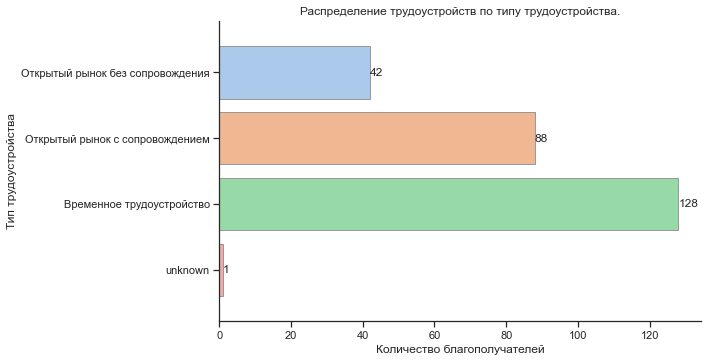

In [15]:
g = (sns.catplot(y="тип_трудоустройства", kind="count",
            palette="pastel", edgecolor=".6",
            height=5, aspect=2,
            data=data)
            .set(title='Распределение трудоустройств по типу трудоустройства.', 
                 xlabel='Количество благополучателей', ylabel='Тип трудоустройства')
           );
# добавим значения на график
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        # add custom labels with the labels=labels parameter if needed
        # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.1)

Итак, большая часть (128) трудоустройств приходится на временные проекты. Чуть меньше, 88 - на открытый рынок с сопровождением,  в то время как 42 трудоустройства приходится на открытый рынок без сопровождения. \
Ниже рассмотрено, как эти трудоустройства распределяются по регионам и провайдерам.

In [16]:
regions = (data.pivot_table(index = 'регион_код', values = 'id_кандидата', aggfunc = 'count')
         .rename(columns = {'id_кандидата': 'количество_трудоустройств'}))
regions = regions.sort_values(by='количество_трудоустройств', ascending=False)

partners = (data.pivot_table(index = 'провайдер_код', values = 'id_кандидата', aggfunc = 'count')
         .rename(columns = {'id_кандидата': 'количество_трудоустройств'})
        )
partners = partners.sort_values(by='количество_трудоустройств', ascending=False)

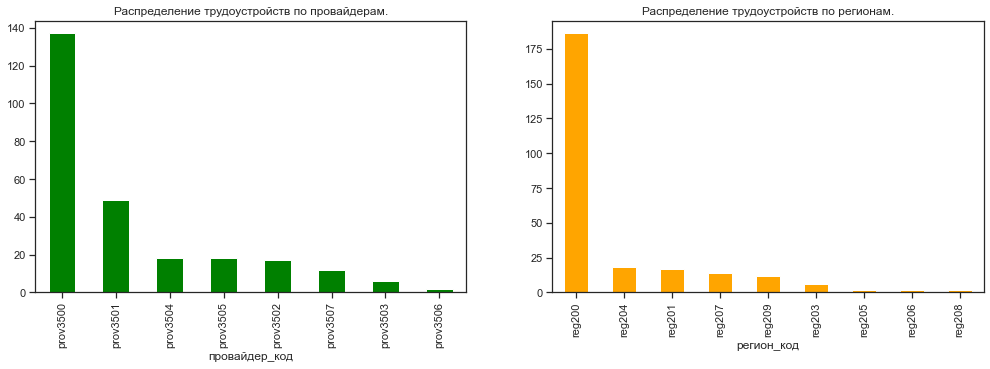

In [17]:
fig, axes = plt.subplots(1,2, figsize=(17,5))

ax = partners.plot(kind='bar', subplots=True, color='green', ax=axes[0], legend = False); 
axes[0].set_title('Распределение трудоустройств по провайдерам.')


regions.plot(kind='bar', subplots=True, color='orange', ax=axes[1], legend = False)
axes[1].set_title('Распределение трудоустройств по регионам.');


По полученным выше диаграммам заметно, что большее количество трудоустройств приходится на провайдеров prov3500 и prov3501. При этом большее количество благополучателей находится в регионе reg200.\
Далее проанаизировано как распределяются трудоустройства среди провайдеров по типу площадки и опыту работы. 

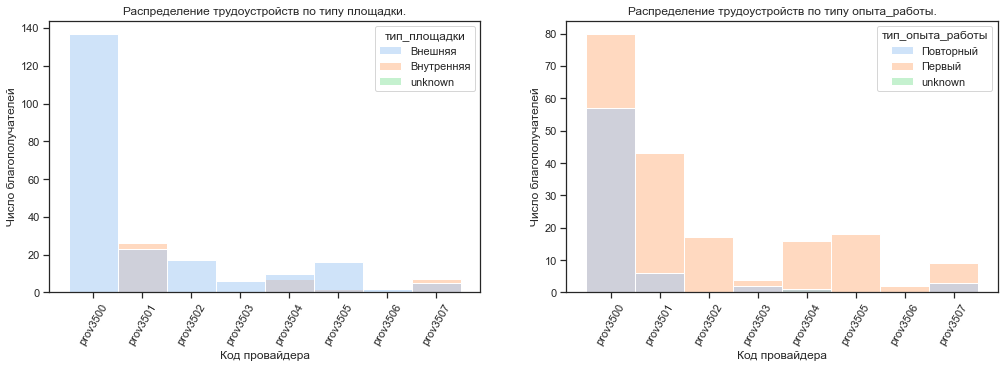

In [18]:
fig, axes = plt.subplots(1,2, figsize=(17,5))

ax =sns.histplot(data=data, x="провайдер_код", binwidth=0.05, hue="тип_площадки",ax=axes[0]);
ax.set(xlabel='Код провайдера', ylabel='Число благополучателей')
axes[0].set_title('Распределение трудоустройств по типу площадки.')
for item in ax.get_xticklabels(): item.set_rotation(60) #задаем вертикальную подпись оси Х
    
ax_2 =sns.histplot(data=data, x="провайдер_код", binwidth=0.05, hue="тип_опыта_работы",ax=axes[1]);
ax_2.set(xlabel='Код провайдера', ylabel='Число благополучателей')
axes[1].set_title('Распределение трудоустройств по типу опыта_работы.')
for item in ax_2.get_xticklabels(): item.set_rotation(60) #задаем вертикальную подпись оси Х
        

Судя по диаграммам, самый крупный провайдер сфокусирован на трудоустройстве балгополучателей на внешнем рынке, в то время как провайдер prov3501 более половины людей трудостраивает на внутреннем рынке. Что касается распределений кандидатов по опыту работы - количество повторных обращений значительно ниже у второго провайдера, нежели у первого. Возможно это объясняется тем, что на внутренней площадке провайдера более комфортные условия труда для благополучателей или же провайдер гораздо позже начал свою деятельность и статистика с обращениями еще неполная, но для этого нужна дополнительная информация.

Для анализа продолжительности трудовой деятельности благополучателей на одном рабочем месте (за исключением временного трудоустройства), создан новый датасет для анализа, исключив все временные трудоустройства.

In [19]:
permanent_contract_df = data.query('тип_трудоустройства!="Временное трудоустройство"')
pm_df = permanent_contract_df
print("В новом датасете количество строчек:", pm_df.shape[0])

В новом датасете количество строчек: 131


Для определения количества трудовых дней на одном рабочем месте для каждого благополучателя, создана дополнительная метрика "количество_трудовых_дн".

In [20]:
pm_df['трудоустроен_на_дату'] = pm_df['завершение_трудоустройства'] #скопируем даты заверешения трудоустройства

# у работающих благополучателей на данный момент проставим текущую дату
pm_df['трудоустроен_на_дату'] = pm_df['трудоустроен_на_дату'].fillna(pd.to_datetime(date.today(), format='%Y-%m-%dT%H:%M:%S'))

#определим количество трудовых дней для каждого благополучателя на текущую дату
for row in pm_df:
    pm_df['количество_трудовых_дн'] = (pm_df['трудоустроен_на_дату'] - pm_df['начало_трудоустройства']).dt.days  
pm_df.head()  

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код,трудоустроен_на_дату,количество_трудовых_дн
0,0,1,Женский,25,2018-12-06 00:00:00,ДА,НЕТ,НЕТ,2023-01-16,NaT,ДА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,2024-01-08,357
1,1,2,Мужской,28,2021-09-22 00:00:00,ДА,НЕТ,НЕТ,2023-01-09,NaT,ДА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500,2024-01-08,364
2,2,3,Женский,31,2016-07-08 00:00:00,ДА,НЕТ,НЕТ,2023-04-18,2023-06-30,ДА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,2023-06-30,73
3,3,4,Мужской,34,2022-10-07 00:00:00,ДА,НЕТ,НЕТ,2022-11-21,2022-12-30,ДА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,2022-12-30,39
4,4,4,Мужской,34,2022-10-07 00:00:00,ДА,НЕТ,НЕТ,2023-03-22,2023-03-30,НЕТ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,2023-03-30,8


Ниже оценка распределение количества трудовых дней среди благополучателей.

Для 50% благополучателей характерно 203.0 дней в трудоустройстве


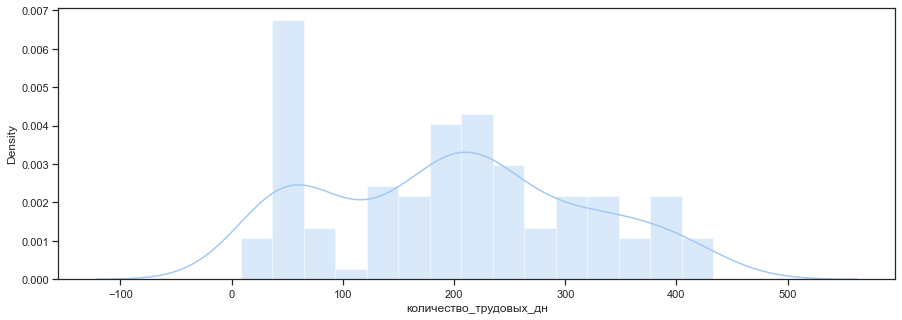

In [21]:
print('Для 50% благополучателей характерно',pm_df['количество_трудовых_дн'].median(), 'дней в трудоустройстве')
plt.figure(figsize=(15, 5))
ax=sns.distplot(pm_df['количество_трудовых_дн'],bins=15).set(xlabel='количество_трудовых_дн')


Основная часть благополучателей имеет 60-190 дней рабочего опыта на одном рабочем месте. Для 50% характерно около 5 месяцев в трудоустройстве. Определено, что достижение отметки в 150 дней, является значительным показателем для благополучателя. \
Далее проанализировано в каких регионах и у каких пройвайдеров этот показатель выше.

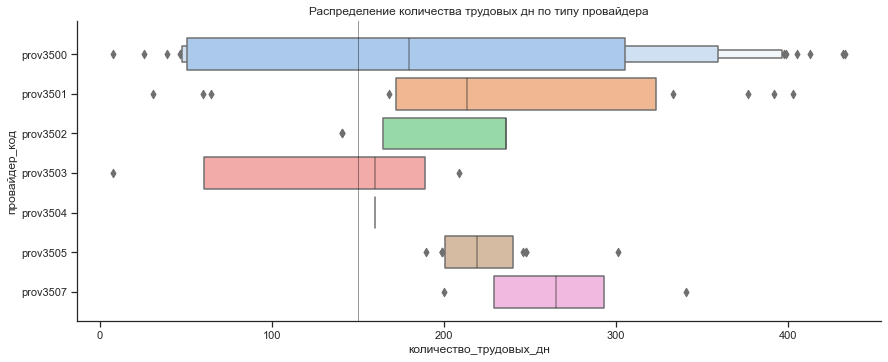

In [22]:
diamonds = sns.load_dataset("diamonds")
g=sns.catplot(y="провайдер_код", x="количество_трудовых_дн", kind="boxen", 
            height=5, aspect=2.5,
            data=pm_df). set(title='Распределение количества трудовых дн по типу провайдера',
                            xlabel='количество_трудовых_дн', ylabel='провайдер_код')

g.axes[0][0].hlines( y = -0.5, color='black', linewidth=700, alpha=.4, #установим отметку в 150 дней
                         xmin = 150, xmax = 151); 


По средней продолжительности трудовой деятельности лидером является провайдер 3507, в среднем благополучатели работают около 220 дней.  Средняя продолжительность работы у провайдеров 3500 и 3503 чуть ниже обозначенной нами границы в 150 дней. Все остальные провайдеры находятся на уровне 150-175 дней.\
Ниже рассмотрена данная метрика по регионам.

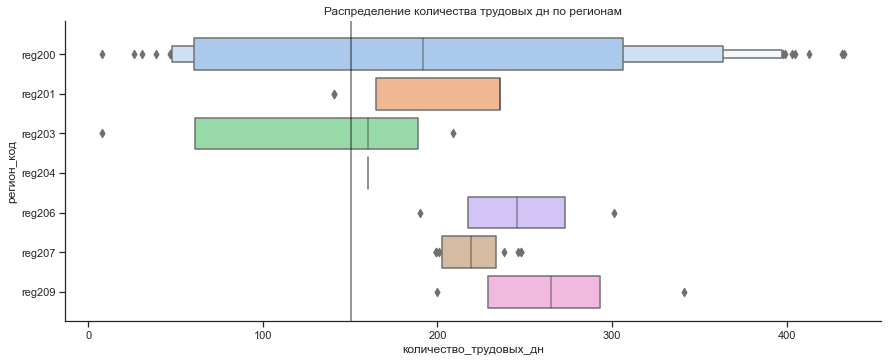

In [23]:
diamonds = sns.load_dataset("diamonds")
g=sns.catplot(y="регион_код", x="количество_трудовых_дн", kind="boxen", 
            height=5, aspect=2.5,
            data=pm_df). set(title='Распределение количества трудовых дн по регионам',
                            xlabel='количество_трудовых_дн', ylabel='регион_код')

g.axes[0][0].hlines( y = -0.5, color='black', linewidth=700, alpha=.4, 
                         xmin = 150, xmax = 151); 

Среди регионов наибольшее среднее количество трудовых дней занимает регион 209, здесь благополучатели трудоустроены в среднем более 210 дней. Следом идет регион 206 (190 дней) и регион 207 (170 дней). Остальные регионы имеют 150 и менее дней в средней трудовой продолжительности благополучателей.

Далее проанализировано распределение длительности трудовых дней по провайдерам с учетом сопровождения.

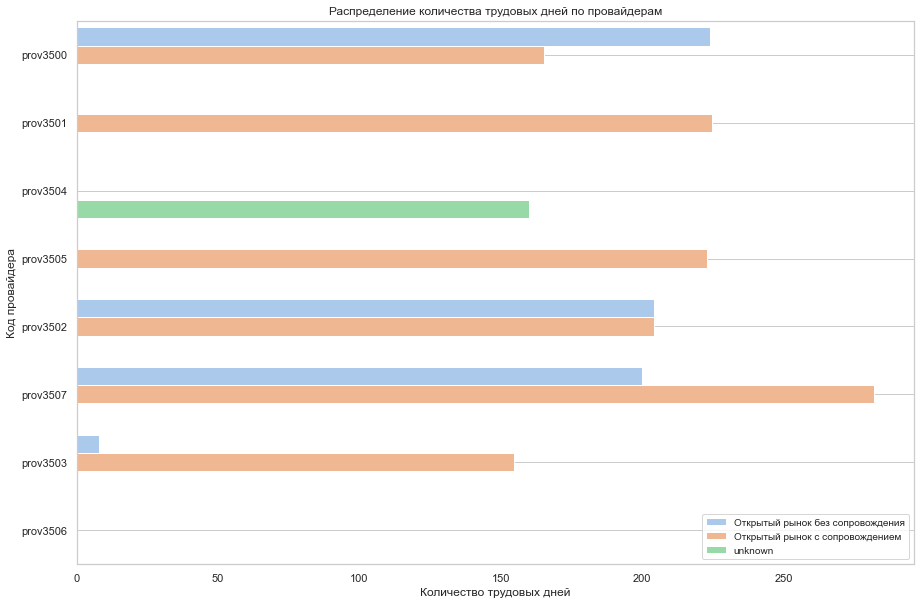

In [24]:
order_partners = partners.index #определим порядок провайдеров
# используем стиль whitegrid из библиотеки seaborn
sns.set_style('whitegrid')
# назначаем размер графика
plt.figure(figsize=(15, 10))
# строим столбчатый график средствами seaborn
ax = sns.barplot(x='количество_трудовых_дн', y='провайдер_код', data=pm_df, hue='тип_трудоустройства',ci = None, order=order_partners)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение количества трудовых дней по провайдерам')
plt.xlabel('Количество трудовых дней')
plt.ylabel('Код провайдера')
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Провайдер 3500 устраивает большее количество кандидатов на открытый рынок без сопровождения, в то время как провайдеры 3501 и 3505 устраивают кандидатов только с сопровождением. Остальные провадеры либо имеют равную пропорцию, либо больше склоняются к трудоустройствам с сопровождением.

Ниже проанализированы факторы которые влияют на продолжительность трудойстройства среди благополучателей. Факторы помогает определить матрица корреляции. \
Для того чтобы провести корелляционный анализ, необходимо, чтобы все переменные для анализа имели числовые характеристики. Для этого, произведена кодировка всех категориальных признаков.

In [25]:
df = pm_df 
df_copy = df.copy() 
df = pd.get_dummies(df, columns=['пол', 'инвалидность', 'тип_площадки', 'тип_трудоустройства', 'регион_код', 'провайдер_код',
                                 'сиротский_опыт', 'адаптированная_образовательная_программа']) 
df['пол'] = df_copy['пол'] 
df['инвалидность'] = df_copy['инвалидность'] 
df['тип_площадки'] = df_copy['тип_площадки'] 
df['тип_трудоустройства'] = df_copy['тип_трудоустройства'] 
df['регион_код'] = df_copy['регион_код'] 
df['провайдер_код'] = df_copy['провайдер_код'] 
df['сиротский_опыт'] = df_copy['сиротский_опыт'] 
df['адаптированная_образовательная_программа'] = df_copy['адаптированная_образовательная_программа'] 

df.head(2)

,Unnamed: 0,id_кандидата,возраст,дата_добавления,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_опыта_работы,трудоустроен_на_дату,количество_трудовых_дн,...,адаптированная_образовательная_программа_ДА,адаптированная_образовательная_программа_НЕТ,пол,инвалидность,тип_площадки,тип_трудоустройства,регион_код,провайдер_код,сиротский_опыт,адаптированная_образовательная_программа
0,0,1,25,2018-12-06 00:00:00,2023-01-16,NaT,ДА,Повторный,2024-01-08,357,...,0,1,Женский,ДА,Внешняя,Открытый рынок без сопровождения,reg200,prov3500,НЕТ,НЕТ
1,1,2,28,2021-09-22 00:00:00,2023-01-09,NaT,ДА,Повторный,2024-01-08,364,...,0,1,Мужской,ДА,Внешняя,Открытый рынок с сопровождением,reg200,prov3500,НЕТ,НЕТ


Итак, все признаки имеют свой код, можно построить матрицу корреляции и выделить только значимые параметры.

In [26]:
correlation_analysis = (pd.DataFrame((round(df.corrwith(df['количество_трудовых_дн'], method='spearman')*100,2))
             .sort_values(ascending=False).drop(labels=['количество_трудовых_дн'])))
correlation_analysis.rename(columns = {0:'correlation'}, inplace = True )
significant_correlation = correlation_analysis.query("abs(correlation)>35")
significant_correlation.style.background_gradient('coolwarm_r')

,correlation
сиротский_опыт_НЕТ,36.900000
инвалидность_ДА,36.690000
инвалидность_НЕТ,-36.690000
сиротский_опыт_ДА,-36.900000


Судя по полученной таблице, явных признаков, влияющих на продолжительность трудоустройства, нет. Примечательно, что и прохождение программы адаптации также не имеет особого влияния на продолжительность рабочих дней с точки зрения статистики. Наиболее влиятельными признаками являются инвалидность и сиротский опыт. Далее эти признаки изучены подробнее.

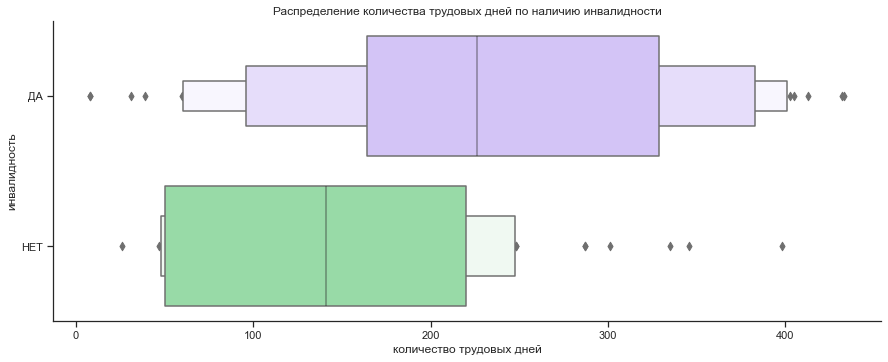

In [27]:
sns.set_theme(style="ticks", palette="pastel")
g=sns.catplot(y="инвалидность", x="количество_трудовых_дн", kind="boxen", palette=["m", "g"],
            height=5, aspect=2.5,
            data=pm_df). set(title='Распределение количества трудовых дней по наличию инвалидности',
                            xlabel='количество трудовых дней', ylabel='инвалидность')

На графике хорошо видно, что благополучатели, имеющие инвалидность в среднем работают более полугода на одном рабочем месте, в то время как без инвалидности средняя продолжительность составляет около 100 дней.

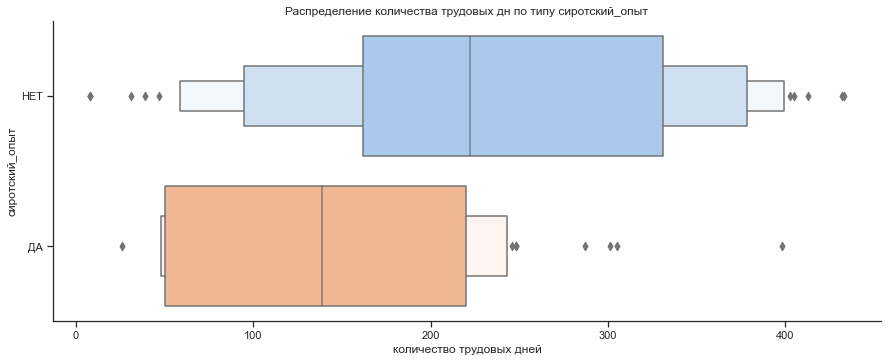

In [28]:
g=sns.catplot(y="сиротский_опыт", x="количество_трудовых_дн", kind="boxen", 
            height=5, aspect=2.5,
            data=pm_df). set(title='Распределение количества трудовых дн по типу сиротский_опыт',
                            xlabel='количество трудовых дней', ylabel='сиротский_опыт')

А здесь можно заметить, что продолжительнось трудовой деятельности на рабочем месте у благополучателей без сиротского опыта тоже явно выше - 160 дней против 90 дней у людей с наличием сиротского опыта.

Несмотря на то, что при построении корреляционой матрицы отмечено, что прохождение адаптационной программы не влияет на продолжительность трудовой  деятельность у выпускников, построен график для того чтобы убедиться в этом.

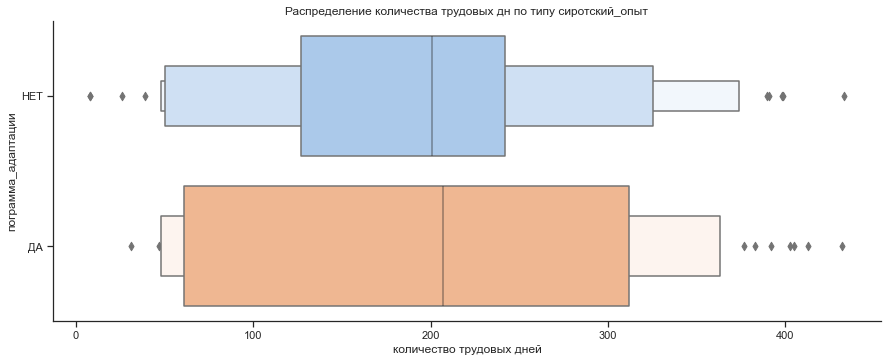

In [29]:
g=sns.catplot(y="адаптированная_образовательная_программа", x="количество_трудовых_дн", kind="boxen", 
            height=5, aspect=2.5,
            data=pm_df). set(title='Распределение количества трудовых дн по типу сиротский_опыт',
                            xlabel='количество трудовых дней', ylabel='пограмма_адаптации')

На полученном графики благополучатели прошедшие адаптационную программу имеют чуть более 155 дней рабочего опыта на одном месте. Но благополучатели, не прошедшие эту программу, также имеют около 150 дней в рабочем опыте. Таким образом можно утверждать, что наличие программы адаптции у благополучателя не имеет влияние на срок его трудовой деятельности.

### Вывод

С помощью предобработки данных и создании дополнительной метрики проанализирован полученный датасет и получены ответы на поставленные вопросы:

 - Средняя продолжительность работы на одном рабочем месте у благополучателей составляет 203 дня;
 - Зависимость между наличием инвалидности и длительностью средней продолжительности работы отсутствует;
 - Зависимость между наличием сиротского опыта и длительностью средней продолжительности работы отсутствует;
 - Зависимость между наличием программы адаптации и длительностью средней продолжительности работы отсутствует;

 
Выявлено, что в целом из 259 трудоустройств только 131 не являются временным. Определено, что не все из упомянутых категорий выше имеют явную зависимость с длительностью средней продолжительности работы. Так, наличие программы адаптции у благополучателя не имеет влияние на срок его трудовой деятельности, в то время как благополучатели с инвалидностью, но без сиротского опыта склонны к более продолжительному рабочему опыту на одном месте. 


<a id='f_3'></a>
## Ссылка на интерактивный дашборд

[К оглавлению](#f_4) 

https://datalens.yandex/j4dk3436yyq88